<a href="https://www.kaggle.com/code/sahilpawar9192/dl-cnn-object-detection-classification?scriptVersionId=229811658" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cards-image-datasetclassification/53cards-53-(200 X 200)-100.00.h5
/kaggle/input/cards-image-datasetclassification/cards.csv
/kaggle/input/cards-image-datasetclassification/14card types-14-(200 X 200)-94.61.h5
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/5.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/1.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/4.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/3.jpg
/kaggle/input/cards-image-datasetclassification/valid/ace of spades/2.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/5.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/1.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/4.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/3.jpg
/kaggle/input/cards-image-datasetclassification/valid/seven of clubs/2.jpg
/kaggle/input/cards-image-datas

# Step 1: Load the Dataset
# 1️⃣ Read the Dataset File

In [2]:
df = pd.read_csv('/kaggle/input/cards-image-datasetclassification/cards.csv')
df.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


# Step 2: Data Preprocessing
# 2️⃣ Understanding Dataset Structure

In [3]:
print("Unique Classes:", df['labels'].nunique())
print(df["labels"].value_counts())

Unique Classes: 53
labels
ace of spades        191
jack of spades       182
ace of hearts        181
jack of clubs        181
jack of hearts       178
seven of spades      175
queen of diamonds    173
queen of spades      172
queen of clubs       171
jack of diamonds     170
eight of diamonds    169
ten of spades        168
six of spades        168
five of spades       168
four of clubs        167
two of spades        165
two of hearts        165
four of hearts       164
nine of spades       164
three of diamonds    163
eight of hearts      162
six of clubs         162
ten of diamonds      161
king of spades       161
five of clubs        160
seven of hearts      153
three of spades      152
ten of clubs         151
four of spades       150
queen of hearts      149
six of diamonds      149
five of diamonds     148
eight of clubs       148
five of hearts       146
king of diamonds     145
eight of spades      145
nine of hearts       143
two of diamonds      143
two of clubs         140

# 3️⃣ Add Full Image Paths

In [4]:
df["filepaths"] = df["filepaths"].apply(lambda x: f"/kaggle/input/cards-image-datasetclassification/{x}")
df.head()

,class index,filepaths,labels,card type,data set
0,0,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,ace,train
1,0,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,ace,train
2,0,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,ace,train
3,0,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,ace,train
4,0,/kaggle/input/cards-image-datasetclassificatio...,ace of clubs,ace,train


# Step 3: Visualizing the Data
# 4️⃣ Display Sample Images

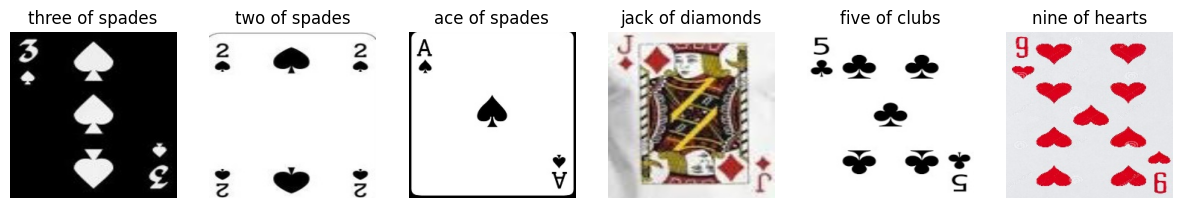

In [5]:
import matplotlib.pyplot as plt
import cv2

def plot_sample_images(df, num_samples=6):
    fig, axes = plt.subplots(1, num_samples, figsize=(15,5))
    for i, ax in enumerate(axes):
        img_path = df.iloc[i]["filepaths"]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.set_title(df.iloc[i]["labels"])
        ax.axis("off")
    plt.show()
plot_sample_images(df.sample(6))

# Step 4: Prepare the Data for CNN
# 5️⃣ Encode Labels (Convert Text Labels to Numbers)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["encoded_labels"] = label_encoder.fit_transform(df["labels"])
label_mapping = dict(zip(label_encoder.classes_,range(len(label_encoder.classes_))))
print("Label Mapping:" , label_mapping)

Label Mapping: {'ace of clubs': 0, 'ace of diamonds': 1, 'ace of hearts': 2, 'ace of spades': 3, 'eight of clubs': 4, 'eight of diamonds': 5, 'eight of hearts': 6, 'eight of spades': 7, 'five of clubs': 8, 'five of diamonds': 9, 'five of hearts': 10, 'five of spades': 11, 'four of clubs': 12, 'four of diamonds': 13, 'four of hearts': 14, 'four of spades': 15, 'jack of clubs': 16, 'jack of diamonds': 17, 'jack of hearts': 18, 'jack of spades': 19, 'joker': 20, 'king of clubs': 21, 'king of diamonds': 22, 'king of hearts': 23, 'king of spades': 24, 'nine of clubs': 25, 'nine of diamonds': 26, 'nine of hearts': 27, 'nine of spades': 28, 'queen of clubs': 29, 'queen of diamonds': 30, 'queen of hearts': 31, 'queen of spades': 32, 'seven of clubs': 33, 'seven of diamonds': 34, 'seven of hearts': 35, 'seven of spades': 36, 'six of clubs': 37, 'six of diamonds': 38, 'six of hearts': 39, 'six of spades': 40, 'ten of clubs': 41, 'ten of diamonds': 42, 'ten of hearts': 43, 'ten of spades': 44, 't

# 6️⃣ Split Dataset into Train and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["encoded_labels"], random_state = 42)
print("Training Samples", len(train_df))
print("Testing Samples", len(test_df))

Training Samples 6524
Testing Samples 1631


# Step 5: Load Images into Tensor Format
# 7️⃣ Load Images for CNN (Resize & Normalize)

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (128,128)
BATCH_SIZE=32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, x_col="filepaths", y_col="labels", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(
    test_df, x_col="filepaths", y_col="labels", target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical")

Found 6523 validated image filenames belonging to 53 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Found 1631 validated image filenames belonging to 53 classes.


# Step 6: Build the CNN Model
# 8️⃣ Define the CNN Architecture

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_mapping), activation='softmax')
    
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 53)                  │           6,837 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,311,477 (12.63 MB)

 Trainable params: 3,311,477 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

# Step 7: Train the CNN Model
# 9️⃣ Train the Model

In [10]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


204/204 ━━━━━━━━━━━━━━━━━━━━ 153s 725ms/step - accuracy: 0.0310 - loss: 3.9703 - val_accuracy: 0.1631 - val_loss: 3.2115
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 149s 722ms/step - accuracy: 0.1050 - loss: 3.3922 - val_accuracy: 0.2299 - val_loss: 2.7121
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 148s 720ms/step - accuracy: 0.1713 - loss: 3.0126 - val_accuracy: 0.3342 - val_loss: 2.3894
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 151s 732ms/step - accuracy: 0.2109 - loss: 2.7432 - val_accuracy: 0.3679 - val_loss: 2.1522
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 150s 727ms/step - accuracy: 0.2459 - loss: 2.6247 - val_accuracy: 0.4298 - val_loss: 1.9873
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 199s 710ms/step - accuracy: 0.2777 - loss: 2.4585 - val_accuracy: 0.4525 - val_loss: 1.9272
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 202s 712ms/step - accuracy: 0.3113 - loss: 2.3699 - val_accuracy: 0.4635 - val_loss: 1.9155
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 144s 697ms/step - accuracy: 0.3250 - loss: 2.31

# Step 8: Evaluate and Save the Model
# 🔟 Plot Training Results

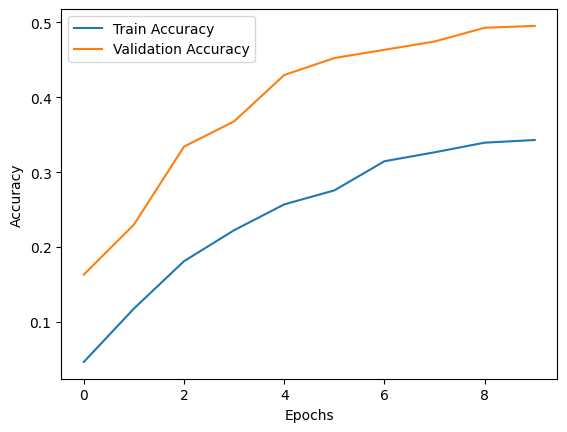

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 🔟 Save the Model for Future Use

In [12]:
model.save("cards_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!
